# PyTorch, регрессия, полносвязные слои

pytorch version of 

https://towardsdatascience.com/predicting-probability-distributions-using-neural-networks-abef7db10eac

https://github.com/taboola/mdn-tensorflow-notebook-example/blob/master/mdn-tf2.ipynb


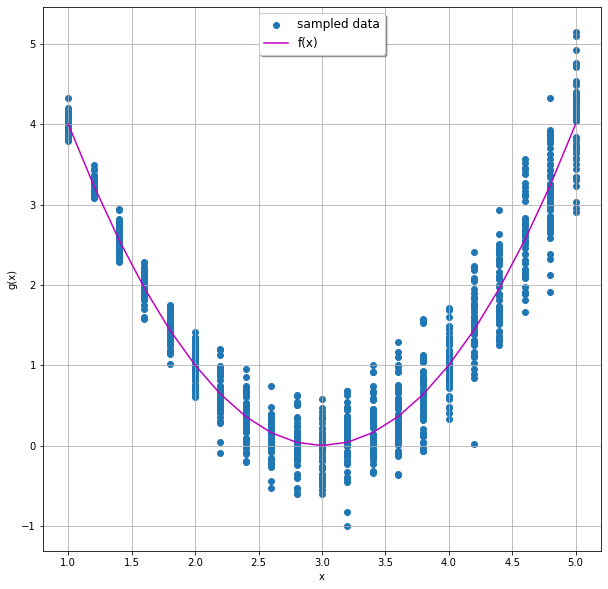

In [1]:
#1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def f(x):
    return x**2-6*x+9 

def data_generator(x,sigma_0,samples):
    return np.random.normal(f(x),sigma_0*x,samples)

sigma_0 = 0.1
x_vals = np.arange(1,5.2,0.2)
x_arr = np.array([])
y_arr = np.array([])
samples = 50
for x in x_vals:
    x_arr = np.append(x_arr, np.full(samples,x))
    y_arr = np.append(y_arr, data_generator(x,sigma_0,samples))
x_arr, y_arr = shuffle(x_arr, y_arr)
x_test = np.arange(1.1,5.1,0.2)

fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('g(x)')
ax.scatter(x_arr,y_arr,label='sampled data')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

In [2]:
#2
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 12)
        self.fc2 = nn.Linear(12,12)
        self.fc3 = nn.Linear(12, 1)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        #x = self.fc1(x)
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=1, bias=True)
)


In [3]:
#3
x_arr2 = x_arr.reshape((x_arr.shape[0],1))
y_arr2 = y_arr.reshape((y_arr.shape[0],1))
#x_arr.unsqueeze(-1)

In [4]:
#4
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 50

#train_len = 17*50 #int(0.8 * x_arr2.shape[0])
# Instantiate training and test data
train_data = Data(x_arr2, y_arr2)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

#test_data = Data(x_arr2, y_arr2)
#test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

#for batch, (X, y) in enumerate(test_dataloader):
#    print(f"Batch: {batch+1}")
#    print(f"X shape: {X.shape}")
#    print(f"y shape: {y.shape}")
#    break

In [5]:
#5
count = 0
for name, param in net.named_parameters():
    print(name, param)
    count +=1
print(count)

fc1.weight Parameter containing:
tensor([[-0.8586],
        [-0.1254],
        [ 0.1404],
        [-0.6613],
        [-0.7989],
        [-0.2890],
        [ 0.7544],
        [ 0.1274],
        [-0.5395],
        [ 0.6095],
        [ 0.5214],
        [-0.7404]], requires_grad=True)
fc1.bias Parameter containing:
tensor([-0.8483, -0.5619, -0.1642, -0.7693,  0.8599,  0.2849, -0.0734,  0.2652,
         0.5698, -0.2785,  0.3919, -0.7846], requires_grad=True)
fc2.weight Parameter containing:
tensor([[ 0.1979, -0.2337,  0.1796,  0.2282, -0.1929,  0.1593,  0.0837,  0.0598,
         -0.0536,  0.0983, -0.1584,  0.2033],
        [ 0.0952, -0.1826,  0.1230, -0.1870, -0.1505,  0.0581, -0.1982, -0.1885,
          0.2576, -0.2655, -0.2544, -0.2381],
        [ 0.0798,  0.1848,  0.1538, -0.2263, -0.1182,  0.1961,  0.2352,  0.2756,
          0.0952, -0.1661,  0.2593,  0.1184],
        [-0.0222, -0.2739,  0.2417,  0.1533, -0.0292, -0.1397, -0.1300,  0.0573,
         -0.0685,  0.1331,  0.1876, -0.0345],
 

In [6]:
#6
learning_rate = 0.03

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

num_epochs = 500

loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = net(X)
        loss = loss_fn(pred, y)
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

/opt/conda/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Training Complete


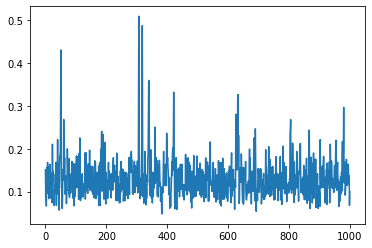

In [8]:
#7
plt.plot(loss_values[-1000:])
#plt.plot(loss_values)

In [9]:
#8
print(np.average(loss_values[-1000:]))

0.1307238372825086


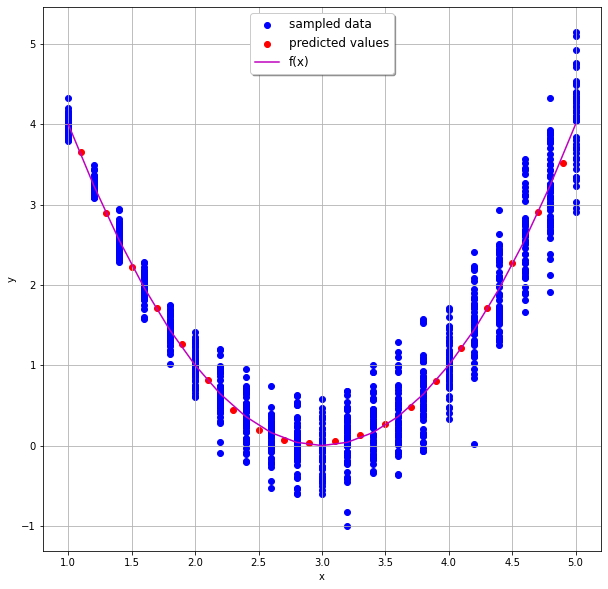

In [10]:
#9
x_test2 = x_test.reshape((x_test.shape[0],1))
y_pred = net(torch.from_numpy(x_test2.astype(np.float32)))

fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.scatter(x_arr,y_arr,c='b',label='sampled data')
ax.scatter(x_test,y_pred.detach().numpy()[:,0],c='r',label='predicted values')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

In [ ]:
#Упражнение: уберите случайность из задачи (пусть точки лежат строго на кривой, одному x соответсвует только один y) и натренируйте нейросеть.

In [11]:
#10
class MDN(nn.Module):

    def __init__(self):
        super(MDN, self).__init__()
        self.fc1 = nn.Linear(1, 12)
        self.fc2 = nn.Linear(12,12)
        self.fc3 = nn.Linear(12, 1)
        self.fc4 = nn.Linear(12, 1)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        mu = self.fc3(x)
        sigma = F.elu(self.fc4(x)) + 1
        return mu, sigma


mdn = MDN()
print(mdn)


learning_rate = 0.03

def mdn_loss(mu,sigma,y):
    dist = torch.distributions.Normal(mu,sigma)
    loss = -dist.log_prob(y) 
    return torch.mean(loss)
            

optimizer = torch.optim.SGD(mdn.parameters(), lr=learning_rate)

num_epochs = 1000

loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        mupred,sigmapred = mdn(X)
        loss = mdn_loss(mupred, sigmapred, y)
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")


MDN(
  (fc1): Linear(in_features=1, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=1, bias=True)
  (fc4): Linear(in_features=12, out_features=1, bias=True)
)
Training Complete


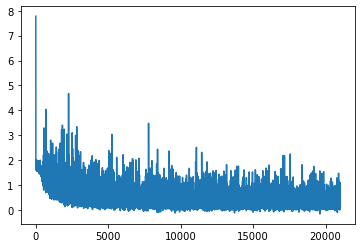

In [12]:
#11
plt.plot(loss_values)

In [13]:
#12
np.average(loss_values[-100:])

0.3233682865428273

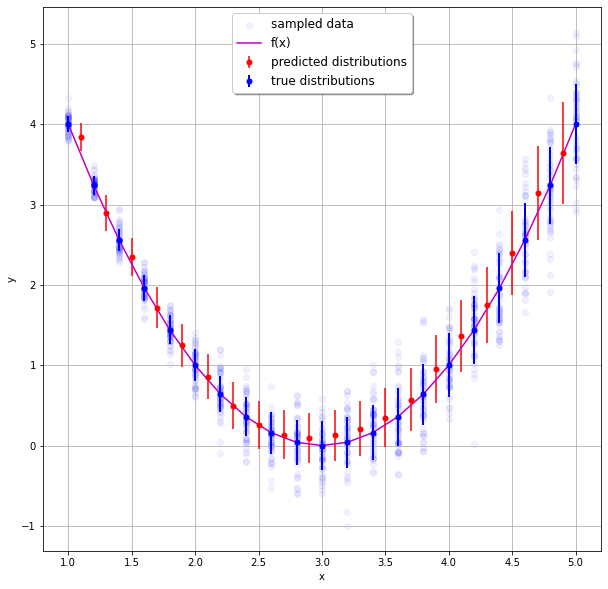

In [14]:
#13
mu_pred, sigma_pred = mdn(torch.from_numpy(x_test2.astype(np.float32)))
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.errorbar(x_test,mu_pred.detach().numpy()[:,0],yerr=np.absolute(sigma_pred.detach().numpy()[:,0]),c='r',ls='None',marker='.',ms=10,label='predicted distributions')
ax.scatter(x_arr,y_arr,c='b',alpha=0.05,label='sampled data')
ax.errorbar(x_vals,list(map(f,x_vals)),yerr=list(map(lambda x: sigma_0*x,x_vals)),c='b',lw=2,ls='None',marker='.',ms=10,label='true distributions')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()